
# Assignment 4

The question posed for Assignment 4 is outlined below.  Data for the required analysis is provided in the attached spreadsheet while a pdf version of the question is available also.

 

A study is to be undertaken to assess the water quality in Homebush Bay. As part of this study, a stormwater quality model has been developed for the 8km2 Powells Creek catchment which drains into Homebush Bay. The basis of this stormwater quality model is the US EPA SWMM software.

The SWMM model uses a non-linear reservoir model for surface runoff (pond model) with a kinematic model for flows in the channel. Water quality simulation is based on simulation of the EMC (event mean concentration) rather than a pollutograph or loadograph; this means that the focus of the water quality simulation is on the prediction of the total mass of contaminant transported during the storm event

At present only the flow quantity component of the model is being calibrated. A milestone for the study is the production of a suitable water quantity model.

The water quality component of the model is yet to be developed.

Data available for use in the calibration are:

1. Rainfall data
    1. 6 pluviometers (i.e. continuous rain gauges) within the catchment;
    2. 6 pluviometers adjacent to the catchment;
    3. 1 daily read gauge within the catchment and another 6 in close proximity to the catchment; and
    4. Radar images of rainfall over the catchment; these images have not been processed, (i.e. converted to rainfall depths) but they are available for the study. The resolution of these radar images is 1 km x 1 km.
2. Catchment data
    1. SRTM and LIDAR based models of the topography;
    2. Detailed plans of the stormwater system in the catchment (note that the catchment is serviced by separate stormwater and sanitary sewer systems);
    3. Detailed maps in GIS format of land use in the catchment (note that the whole catchment is urbanised); Soil Maps of the catchment derived from the National Soil Survey

Gauged data at one site in the catchment for 49 years. There are some concerns about the rating curve at this gauge station for higher flows; this concern arises from the proximity of railway culverts and the potential for the station to be drowned during higher flows.  This gauging station is located in the upper reaches of the catchment and monitors only 2.4km2 of the catchment.


In the attached file, details of calibration simulations are provided.  Data included in the file for each event (there are multiple events in the file) are:

- Rainfall records from the pluviometer located at the catchment outlet;
- Recorded flow for the event; and
- Predicted flows for alternative sets of parameter values.

## Part A (56 marks)

1. Select and justify a calibration metric suitable for use to assess the calibration of the quantity component of the model;

2. Apply this metric to the available data in a manner where all events are considered concurrently. You will need to consider how the different events can be combined and to justify this approach;

3. Select and justify the best parameter set to be used with the water quality component of the model.

 

## Part B (24 marks)

Briefly discuss the following:

1. How the different conceptual components of a catchment model would be used in developing this model.

2. The sources of error in predictions obtained from a catchment model with reference to the current study. How should knowledge of these errors be considered in the current application?

3. Whether the selected parameter values would change if a kinematic wave model were to be used in lieu of the non-linear reservoir model of surface runoff.

 

## Part C (20 marks)

You have been asked to improve the current catchment model. To achieve that improvement, you have time and resources available.  What would you do?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Reading XLSX files

In [2]:
event_1 = pd.read_excel(
    './Inputs_CM_Assignment_4/49255 2021 Assignment 4 data.xlsx', sheet_name='Event 1', 
    names=['Date_Time_recorded', 'Q_recorded', 'Date_Time_predicted', 'Q_predicted_1', 'Q_predicted_2', 'Q_predicted_3', 'Q_predicted_4'], 
    skiprows=1)
event_1

,Date_Time_recorded,Q_recorded,Date_Time_predicted,Q_predicted_1,Q_predicted_2,Q_predicted_3,Q_predicted_4
0,1997-10-07 08:02:00,0.078,1997-10-07 08:33:00,0.0,0.000,0.0,0.000
1,1997-10-07 08:07:00,0.078,1997-10-07 08:34:00,0.0,0.000,0.0,0.000
2,1997-10-07 08:12:00,0.078,1997-10-07 08:35:00,0.0,0.001,0.0,0.000
3,1997-10-07 08:17:00,0.078,1997-10-07 08:36:00,0.0,0.001,0.0,0.001
4,1997-10-07 08:22:00,0.078,1997-10-07 08:37:00,0.0,0.001,0.0,0.001
...,...,...,...,...,...,...,...
1194,NaT,NaN,1997-10-08 04:27:00,0.0,0.000,0.0,0.000
1195,NaT,NaN,1997-10-08 04:28:00,0.0,0.000,0.0,0.000
1196,NaT,NaN,1997-10-08 04:29:00,0.0,0.000,0.0,0.000
1197,NaT,NaN,1997-10-08 04:30:00,0.0,0.000,0.0,0.000


In [3]:
event_2 = pd.read_excel(
    './Inputs_CM_Assignment_4/49255 2021 Assignment 4 data.xlsx', sheet_name='Event 2', 
    names=['Date_Time_recorded', 'Q_recorded', 'Date_Time_predicted', 'Q_predicted_1', 'Q_predicted_2', 'Q_predicted_3', 'Q_predicted_4'], 
    skiprows=1)
event_2

,Date_Time_recorded,Q_recorded,Date_Time_predicted,Q_predicted_1,Q_predicted_2,Q_predicted_3,Q_predicted_4
0,1985-10-23 13:00:00,0.028,1985-10-23 13:01:00,0.000,0.000,0.000,0.000
1,1985-10-23 13:05:00,0.028,1985-10-23 13:02:00,0.000,0.000,0.000,0.000
2,1985-10-23 13:10:00,0.028,1985-10-23 13:03:00,0.000,0.000,0.000,0.000
3,1985-10-23 13:15:00,0.028,1985-10-23 13:04:00,0.000,0.000,0.000,0.000
4,1985-10-23 13:20:00,0.028,1985-10-23 13:05:00,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...
414,NaT,NaN,1985-10-23 19:55:00,0.007,0.004,0.022,0.014
415,NaT,NaN,1985-10-23 19:56:00,0.007,0.004,0.022,0.014
416,NaT,NaN,1985-10-23 19:57:00,0.007,0.004,0.021,0.014
417,NaT,NaN,1985-10-23 19:58:00,0.007,0.004,0.021,0.014


In [4]:
event_3 = pd.read_excel(
    './Inputs_CM_Assignment_4/49255 2021 Assignment 4 data.xlsx', sheet_name='Event 3', 
    names=['Date_Time_recorded', 'Q_recorded', 'Date_Time_predicted', 'Q_predicted_1', 'Q_predicted_2', 'Q_predicted_3', 'Q_predicted_4'], 
    skiprows=1)
event_3

,Date_Time_recorded,Q_recorded,Date_Time_predicted,Q_predicted_1,Q_predicted_2,Q_predicted_3,Q_predicted_4
0,1993-01-06 17:30:00,0.002,1993-01-06 17:31:00,0.0,0.0,0.0,0.0
1,1993-01-06 17:35:00,0.002,1993-01-06 17:32:00,0.0,0.0,0.0,0.0
2,1993-01-06 17:40:00,0.002,1993-01-06 17:33:00,0.0,0.0,0.0,0.0
3,1993-01-06 17:45:00,0.002,1993-01-06 17:34:00,0.0,0.0,0.0,0.0
4,1993-01-06 17:50:00,0.002,1993-01-06 17:35:00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
745,NaT,NaN,1993-01-07 05:56:00,0.0,0.0,0.0,0.0
746,NaT,NaN,1993-01-07 05:57:00,0.0,0.0,0.0,0.0
747,NaT,NaN,1993-01-07 05:58:00,0.0,0.0,0.0,0.0
748,NaT,NaN,1993-01-07 05:59:00,0.0,0.0,0.0,0.0


# Slicing XLSX files

## event 1

In [5]:
e_1_r = event_1[['Date_Time_recorded', 'Q_recorded']].set_index('Date_Time_recorded')
e_1_r

,Q_recorded
Date_Time_recorded,
1997-10-07 08:02:00,0.078
1997-10-07 08:07:00,0.078
1997-10-07 08:12:00,0.078
1997-10-07 08:17:00,0.078
1997-10-07 08:22:00,0.078
...,...
NaT,NaN
NaT,NaN
NaT,NaN


In [6]:
e_1_p = event_1[['Date_Time_predicted', 'Q_predicted_1', 'Q_predicted_2', 'Q_predicted_3', 'Q_predicted_4']].set_index('Date_Time_predicted')
e_1_p

,Q_predicted_1,Q_predicted_2,Q_predicted_3,Q_predicted_4
Date_Time_predicted,,,,
1997-10-07 08:33:00,0.0,0.000,0.0,0.000
1997-10-07 08:34:00,0.0,0.000,0.0,0.000
1997-10-07 08:35:00,0.0,0.001,0.0,0.000
1997-10-07 08:36:00,0.0,0.001,0.0,0.001
1997-10-07 08:37:00,0.0,0.001,0.0,0.001
...,...,...,...,...
1997-10-08 04:27:00,0.0,0.000,0.0,0.000
1997-10-08 04:28:00,0.0,0.000,0.0,0.000
1997-10-08 04:29:00,0.0,0.000,0.0,0.000


In [7]:
e_1 = pd.merge(e_1_r, e_1_p, left_index=True, right_index=True)
e_1.reset_index(inplace=True, names='Date_Time')
e_1

,Date_Time,Q_recorded,Q_predicted_1,Q_predicted_2,Q_predicted_3,Q_predicted_4
0,1997-10-07 08:37:00,0.078,0.000,0.001,0.000,0.001
1,1997-10-07 08:42:00,0.078,0.006,0.010,0.002,0.008
2,1997-10-07 08:47:00,0.078,0.010,0.012,0.002,0.012
3,1997-10-07 08:52:00,0.130,0.013,0.029,0.041,0.049
4,1997-10-07 08:57:00,0.323,0.026,0.159,0.099,0.106
...,...,...,...,...,...,...
228,1997-10-08 03:37:00,0.133,0.000,0.000,0.000,0.000
229,1997-10-08 03:42:00,0.133,0.000,0.000,0.000,0.000
230,1997-10-08 03:47:00,0.133,0.000,0.000,0.000,0.000
231,1997-10-08 03:52:00,0.133,0.000,0.000,0.000,0.000


## event 2

In [8]:
e_2_r = event_2[['Date_Time_recorded', 'Q_recorded']].set_index('Date_Time_recorded')
e_2_r

,Q_recorded
Date_Time_recorded,
1985-10-23 13:00:00,0.028
1985-10-23 13:05:00,0.028
1985-10-23 13:10:00,0.028
1985-10-23 13:15:00,0.028
1985-10-23 13:20:00,0.028
...,...
NaT,NaN
NaT,NaN
NaT,NaN


In [9]:
e_2_p = event_2[['Date_Time_predicted', 'Q_predicted_1', 'Q_predicted_2', 'Q_predicted_3', 'Q_predicted_4']].set_index('Date_Time_predicted')
e_2_p

,Q_predicted_1,Q_predicted_2,Q_predicted_3,Q_predicted_4
Date_Time_predicted,,,,
1985-10-23 13:01:00,0.000,0.000,0.000,0.000
1985-10-23 13:02:00,0.000,0.000,0.000,0.000
1985-10-23 13:03:00,0.000,0.000,0.000,0.000
1985-10-23 13:04:00,0.000,0.000,0.000,0.000
1985-10-23 13:05:00,0.000,0.000,0.000,0.000
...,...,...,...,...
1985-10-23 19:55:00,0.007,0.004,0.022,0.014
1985-10-23 19:56:00,0.007,0.004,0.022,0.014
1985-10-23 19:57:00,0.007,0.004,0.021,0.014


In [10]:
e_2 = pd.merge(e_2_r, e_2_p, left_index=True, right_index=True)
e_2.reset_index(inplace=True, names='Date_Time')
e_2

,Date_Time,Q_recorded,Q_predicted_1,Q_predicted_2,Q_predicted_3,Q_predicted_4
0,1985-10-23 13:05:00,0.028,0.000,0.000,0.000,0.000
1,1985-10-23 13:10:00,0.028,0.000,0.000,0.000,0.000
2,1985-10-23 13:15:00,0.028,0.000,0.000,0.000,0.000
3,1985-10-23 13:20:00,0.028,0.000,0.000,0.000,0.000
4,1985-10-23 13:25:00,0.028,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...
78,1985-10-23 19:35:00,0.100,0.011,0.006,0.031,0.021
79,1985-10-23 19:40:00,0.097,0.010,0.005,0.028,0.019
80,1985-10-23 19:45:00,0.097,0.009,0.005,0.026,0.017
81,1985-10-23 19:50:00,0.097,0.008,0.004,0.024,0.016


## event 3

In [11]:
e_3_r = event_3[['Date_Time_recorded', 'Q_recorded']].set_index('Date_Time_recorded')
e_3_r

,Q_recorded
Date_Time_recorded,
1993-01-06 17:30:00,0.002
1993-01-06 17:35:00,0.002
1993-01-06 17:40:00,0.002
1993-01-06 17:45:00,0.002
1993-01-06 17:50:00,0.002
...,...
NaT,NaN
NaT,NaN
NaT,NaN


In [12]:
e_3_p = event_3[['Date_Time_predicted', 'Q_predicted_1', 'Q_predicted_2', 'Q_predicted_3', 'Q_predicted_4']].set_index('Date_Time_predicted')
e_3_p

,Q_predicted_1,Q_predicted_2,Q_predicted_3,Q_predicted_4
Date_Time_predicted,,,,
1993-01-06 17:31:00,0.0,0.0,0.0,0.0
1993-01-06 17:32:00,0.0,0.0,0.0,0.0
1993-01-06 17:33:00,0.0,0.0,0.0,0.0
1993-01-06 17:34:00,0.0,0.0,0.0,0.0
1993-01-06 17:35:00,0.0,0.0,0.0,0.0
...,...,...,...,...
1993-01-07 05:56:00,0.0,0.0,0.0,0.0
1993-01-07 05:57:00,0.0,0.0,0.0,0.0
1993-01-07 05:58:00,0.0,0.0,0.0,0.0


In [13]:
e_3 = pd.merge(e_3_r, e_3_p, left_index=True, right_index=True)
e_3.reset_index(inplace=True, names='Date_Time')
e_3

,Date_Time,Q_recorded,Q_predicted_1,Q_predicted_2,Q_predicted_3,Q_predicted_4
0,1993-01-06 17:35:00,0.002,0.0,0.000,0.0,0.0
1,1993-01-06 17:40:00,0.002,0.0,0.000,0.0,0.0
2,1993-01-06 17:45:00,0.002,0.0,0.000,0.0,0.0
3,1993-01-06 17:50:00,0.002,0.0,0.000,0.0,0.0
4,1993-01-06 17:55:00,0.285,0.0,0.000,0.0,0.0
...,...,...,...,...,...,...
145,1993-01-07 05:40:00,0.038,0.0,0.001,0.0,0.0
146,1993-01-07 05:45:00,0.038,0.0,0.001,0.0,0.0
147,1993-01-07 05:50:00,0.038,0.0,0.000,0.0,0.0
148,1993-01-07 05:55:00,0.038,0.0,0.000,0.0,0.0


# Plotting

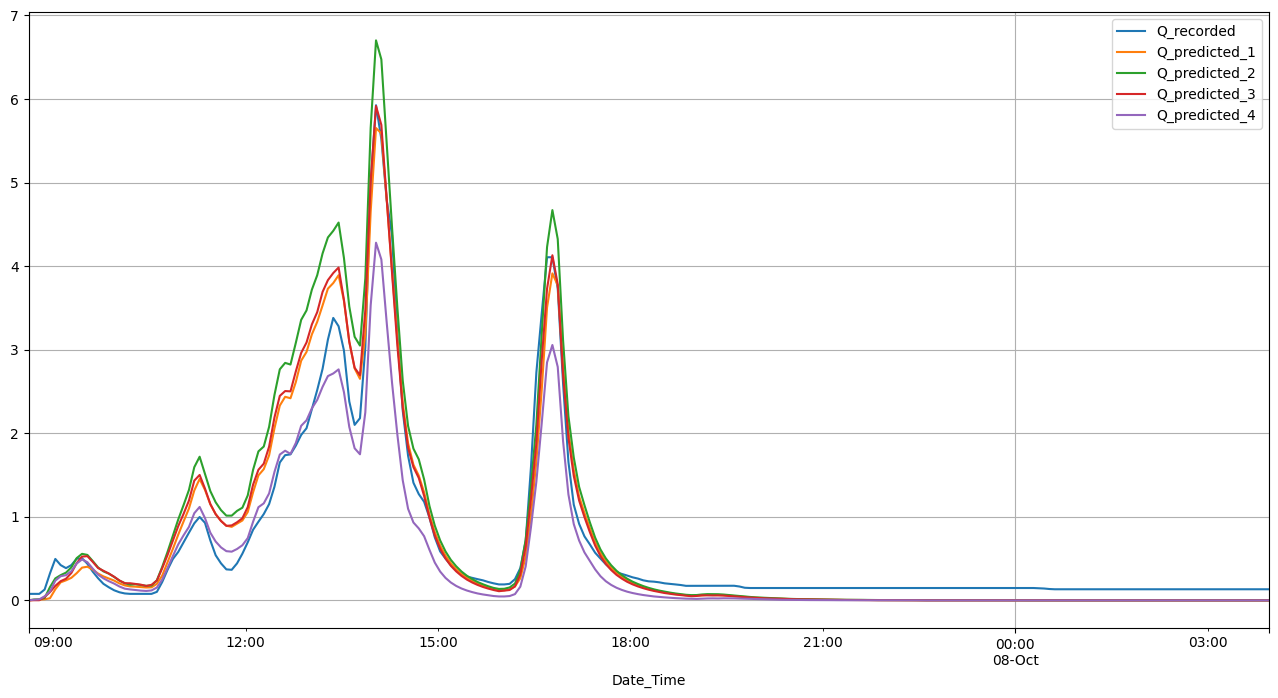

In [14]:
e_1.plot(
    x='Date_Time', 
    y=['Q_recorded', 'Q_predicted_1', 'Q_predicted_2', 'Q_predicted_3', 'Q_predicted_4'],
    figsize=(16,8),
    grid=True);

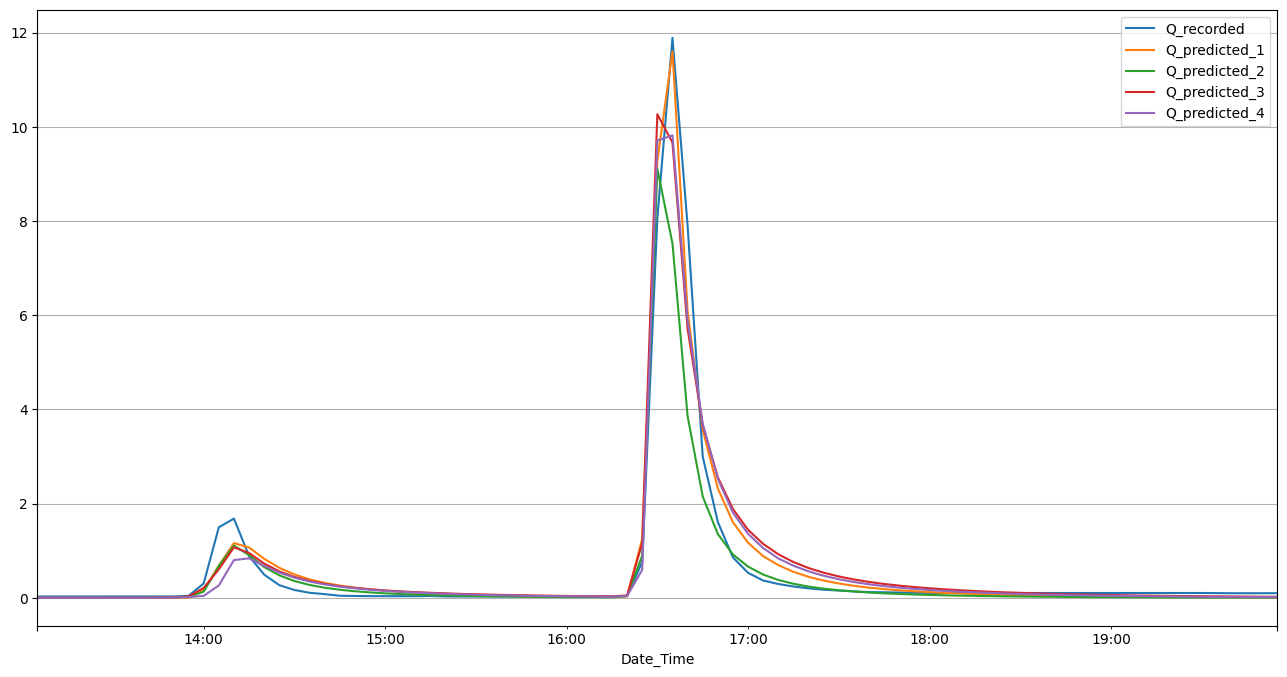

In [15]:
e_2.plot(
    x='Date_Time', 
    y=['Q_recorded', 'Q_predicted_1', 'Q_predicted_2', 'Q_predicted_3', 'Q_predicted_4'],
    figsize=(16,8),
    grid=True);

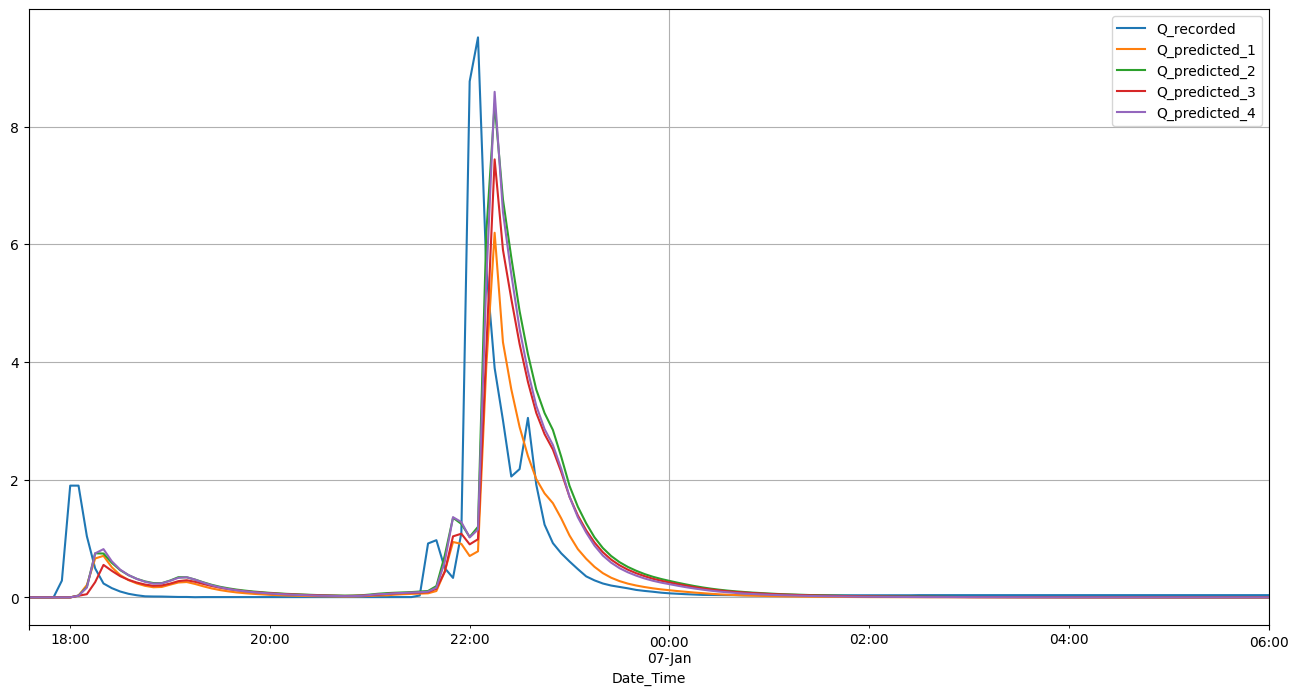

In [16]:
e_3.plot(
    x='Date_Time', 
    y=['Q_recorded', 'Q_predicted_1', 'Q_predicted_2', 'Q_predicted_3', 'Q_predicted_4'],
    figsize=(16,8),
    grid=True);

# RMSE

## event 1

In [17]:
e_1['sq_diff_1'] = (e_1.Q_predicted_1 - e_1.Q_recorded) ** 2
e_1['sq_diff_2'] = (e_1.Q_predicted_2 - e_1.Q_recorded) ** 2
e_1['sq_diff_3'] = (e_1.Q_predicted_3 - e_1.Q_recorded) ** 2
e_1['sq_diff_4'] = (e_1.Q_predicted_4 - e_1.Q_recorded) ** 2
e_1

,Date_Time,Q_recorded,Q_predicted_1,Q_predicted_2,Q_predicted_3,Q_predicted_4,sq_diff_1,sq_diff_2,sq_diff_3,sq_diff_4
0,1997-10-07 08:37:00,0.078,0.000,0.001,0.000,0.001,0.006084,0.005929,0.006084,0.005929
1,1997-10-07 08:42:00,0.078,0.006,0.010,0.002,0.008,0.005184,0.004624,0.005776,0.004900
2,1997-10-07 08:47:00,0.078,0.010,0.012,0.002,0.012,0.004624,0.004356,0.005776,0.004356
3,1997-10-07 08:52:00,0.130,0.013,0.029,0.041,0.049,0.013689,0.010201,0.007921,0.006561
4,1997-10-07 08:57:00,0.323,0.026,0.159,0.099,0.106,0.088209,0.026896,0.050176,0.047089
...,...,...,...,...,...,...,...,...,...,...
228,1997-10-08 03:37:00,0.133,0.000,0.000,0.000,0.000,0.017689,0.017689,0.017689,0.017689
229,1997-10-08 03:42:00,0.133,0.000,0.000,0.000,0.000,0.017689,0.017689,0.017689,0.017689
230,1997-10-08 03:47:00,0.133,0.000,0.000,0.000,0.000,0.017689,0.017689,0.017689,0.017689
231,1997-10-08 03:52:00,0.133,0.000,0.000,0.000,0.000,0.017689,0.017689,0.017689,0.017689


In [18]:
rmse_1 = (e_1.iloc[:,6:].sum() / e_1.shape[0]) ** .5
rmse_1

sq_diff_1    0.283680
sq_diff_2    0.420927
sq_diff_3    0.295633
sq_diff_4    0.358843
dtype: float64

## event 2

In [19]:
e_2['sq_diff_1'] = (e_2.Q_predicted_1 - e_2.Q_recorded) ** 2
e_2['sq_diff_2'] = (e_2.Q_predicted_2 - e_2.Q_recorded) ** 2
e_2['sq_diff_3'] = (e_2.Q_predicted_3 - e_2.Q_recorded) ** 2
e_2['sq_diff_4'] = (e_2.Q_predicted_4 - e_2.Q_recorded) ** 2
e_2

,Date_Time,Q_recorded,Q_predicted_1,Q_predicted_2,Q_predicted_3,Q_predicted_4,sq_diff_1,sq_diff_2,sq_diff_3,sq_diff_4
0,1985-10-23 13:05:00,0.028,0.000,0.000,0.000,0.000,0.000784,0.000784,0.000784,0.000784
1,1985-10-23 13:10:00,0.028,0.000,0.000,0.000,0.000,0.000784,0.000784,0.000784,0.000784
2,1985-10-23 13:15:00,0.028,0.000,0.000,0.000,0.000,0.000784,0.000784,0.000784,0.000784
3,1985-10-23 13:20:00,0.028,0.000,0.000,0.000,0.000,0.000784,0.000784,0.000784,0.000784
4,1985-10-23 13:25:00,0.028,0.000,0.000,0.000,0.000,0.000784,0.000784,0.000784,0.000784
...,...,...,...,...,...,...,...,...,...,...
78,1985-10-23 19:35:00,0.100,0.011,0.006,0.031,0.021,0.007921,0.008836,0.004761,0.006241
79,1985-10-23 19:40:00,0.097,0.010,0.005,0.028,0.019,0.007569,0.008464,0.004761,0.006084
80,1985-10-23 19:45:00,0.097,0.009,0.005,0.026,0.017,0.007744,0.008464,0.005041,0.006400
81,1985-10-23 19:50:00,0.097,0.008,0.004,0.024,0.016,0.007921,0.008649,0.005329,0.006561


In [20]:
rmse_2 = (e_2.iloc[:,6:].sum() / e_2.shape[0]) ** .5
rmse_2

sq_diff_1    0.335469
sq_diff_2    0.683335
sq_diff_3    0.509939
sq_diff_4    0.468137
dtype: float64

## event 3

In [21]:
e_3['sq_diff_1'] = (e_3.Q_predicted_1 - e_3.Q_recorded) ** 2
e_3['sq_diff_2'] = (e_3.Q_predicted_2 - e_3.Q_recorded) ** 2
e_3['sq_diff_3'] = (e_3.Q_predicted_3 - e_3.Q_recorded) ** 2
e_3['sq_diff_4'] = (e_3.Q_predicted_4 - e_3.Q_recorded) ** 2
e_3

,Date_Time,Q_recorded,Q_predicted_1,Q_predicted_2,Q_predicted_3,Q_predicted_4,sq_diff_1,sq_diff_2,sq_diff_3,sq_diff_4
0,1993-01-06 17:35:00,0.002,0.0,0.000,0.0,0.0,0.000004,0.000004,0.000004,0.000004
1,1993-01-06 17:40:00,0.002,0.0,0.000,0.0,0.0,0.000004,0.000004,0.000004,0.000004
2,1993-01-06 17:45:00,0.002,0.0,0.000,0.0,0.0,0.000004,0.000004,0.000004,0.000004
3,1993-01-06 17:50:00,0.002,0.0,0.000,0.0,0.0,0.000004,0.000004,0.000004,0.000004
4,1993-01-06 17:55:00,0.285,0.0,0.000,0.0,0.0,0.081225,0.081225,0.081225,0.081225
...,...,...,...,...,...,...,...,...,...,...
145,1993-01-07 05:40:00,0.038,0.0,0.001,0.0,0.0,0.001444,0.001369,0.001444,0.001444
146,1993-01-07 05:45:00,0.038,0.0,0.001,0.0,0.0,0.001444,0.001369,0.001444,0.001444
147,1993-01-07 05:50:00,0.038,0.0,0.000,0.0,0.0,0.001444,0.001444,0.001444,0.001444
148,1993-01-07 05:55:00,0.038,0.0,0.000,0.0,0.0,0.001444,0.001444,0.001444,0.001444


In [22]:
rmse_3 = (e_3.iloc[:,6:].sum() / e_3.shape[0]) ** .5
rmse_3

sq_diff_1    1.054145
sq_diff_2    1.200006
sq_diff_3    1.140358
sq_diff_4    1.177025
dtype: float64

In [86]:
pd.DataFrame(data=e_3.iloc[:,6:10].columns)

,0
0,sq_diff_1
1,sq_diff_2
2,sq_diff_3
3,sq_diff_4


## RMSE results

In [23]:
rmse = pd.DataFrame([rmse_1, rmse_2, rmse_3])
rmse.columns=['rmse_1', 'rmse_2', 'rmse_3', 'rmse_4']
rmse

,rmse_1,rmse_2,rmse_3,rmse_4
0,0.283680,0.420927,0.295633,0.358843
1,0.335469,0.683335,0.509939,0.468137
2,1.054145,1.200006,1.140358,1.177025


In [24]:
# fig, ax = plt.subplots(layout='constrained')

# x = np.arange(len(rmse.columns))
# width = 0.25
# multiplier = 0

# for ind in rmse.itertuples(name=None):
#     offset = width*ind[0]
#     rects = ax.bar(x)

# ax.bar(x=rmse.columns, height=rmse.max(), width=.6, align='edge', data=rmse.iloc[0])
# ax.bar(x=rmse.columns, height=rmse.max(), width=.6, align='center', data=rmse.iloc[1])
# ax.bar(x=rmse.columns, height=rmse.max(), width=-.3, align='edge', data=rmse.iloc[2])

# MSE - Mean Squared Error

## event 1

In [25]:
mse_1 = (e_1.iloc[:,6:].sum() / e_1.shape[0])
mse_1

sq_diff_1    0.080474
sq_diff_2    0.177179
sq_diff_3    0.087399
sq_diff_4    0.128768
dtype: float64

## event 2

In [26]:
mse_2 = (e_2.iloc[:,6:].sum() / e_2.shape[0])
mse_2

sq_diff_1    0.112539
sq_diff_2    0.466947
sq_diff_3    0.260038
sq_diff_4    0.219153
dtype: float64

## event 3

In [27]:
mse_3 = (e_3.iloc[:,6:].sum() / e_3.shape[0])
mse_3

sq_diff_1    1.111223
sq_diff_2    1.440015
sq_diff_3    1.300417
sq_diff_4    1.385388
dtype: float64

In [87]:
pd.DataFrame(data=e_3.iloc[:,6:10].columns)

,0
0,sq_diff_1
1,sq_diff_2
2,sq_diff_3
3,sq_diff_4


## MSE results

In [28]:
mse = pd.DataFrame([mse_1, mse_2, mse_3])
mse.columns=['mse_1', 'mse_2', 'mse_3', 'mse_4']
mse

,mse_1,mse_2,mse_3,mse_4
0,0.080474,0.177179,0.087399,0.128768
1,0.112539,0.466947,0.260038,0.219153
2,1.111223,1.440015,1.300417,1.385388


# Sum of Square of differences - SSD

## event 1

In [29]:
ssd_abs_1 = e_1.iloc[:,6:].sum()
ssd_abs_1

sq_diff_1    18.750470
sq_diff_2    41.282819
sq_diff_3    20.363968
sq_diff_4    30.003048
dtype: float64

In [30]:
e_1['rel_sq_diff_1'] = ((e_1.Q_predicted_1 - e_1.Q_recorded) / e_1.Q_recorded) ** 2
e_1['rel_sq_diff_2'] = ((e_1.Q_predicted_2 - e_1.Q_recorded) / e_1.Q_recorded) ** 2
e_1['rel_sq_diff_3'] = ((e_1.Q_predicted_3 - e_1.Q_recorded) / e_1.Q_recorded) ** 2
e_1['rel_sq_diff_4'] = ((e_1.Q_predicted_4 - e_1.Q_recorded) / e_1.Q_recorded) ** 2
e_1

,Date_Time,Q_recorded,Q_predicted_1,Q_predicted_2,Q_predicted_3,Q_predicted_4,sq_diff_1,sq_diff_2,sq_diff_3,sq_diff_4,rel_sq_diff_1,rel_sq_diff_2,rel_sq_diff_3,rel_sq_diff_4
0,1997-10-07 08:37:00,0.078,0.000,0.001,0.000,0.001,0.006084,0.005929,0.006084,0.005929,1.000000,0.974523,1.000000,0.974523
1,1997-10-07 08:42:00,0.078,0.006,0.010,0.002,0.008,0.005184,0.004624,0.005776,0.004900,0.852071,0.760026,0.949375,0.805391
2,1997-10-07 08:47:00,0.078,0.010,0.012,0.002,0.012,0.004624,0.004356,0.005776,0.004356,0.760026,0.715976,0.949375,0.715976
3,1997-10-07 08:52:00,0.130,0.013,0.029,0.041,0.049,0.013689,0.010201,0.007921,0.006561,0.810000,0.603609,0.468698,0.388225
4,1997-10-07 08:57:00,0.323,0.026,0.159,0.099,0.106,0.088209,0.026896,0.050176,0.047089,0.845489,0.257800,0.480940,0.451351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,1997-10-08 03:37:00,0.133,0.000,0.000,0.000,0.000,0.017689,0.017689,0.017689,0.017689,1.000000,1.000000,1.000000,1.000000
229,1997-10-08 03:42:00,0.133,0.000,0.000,0.000,0.000,0.017689,0.017689,0.017689,0.017689,1.000000,1.000000,1.000000,1.000000
230,1997-10-08 03:47:00,0.133,0.000,0.000,0.000,0.000,0.017689,0.017689,0.017689,0.017689,1.000000,1.000000,1.000000,1.000000
231,1997-10-08 03:52:00,0.133,0.000,0.000,0.000,0.000,0.017689,0.017689,0.017689,0.017689,1.000000,1.000000,1.000000,1.000000


In [31]:
ssd_rel_1 = e_1.iloc[:,10:].sum()
ssd_rel_1

rel_sq_diff_1    132.113994
rel_sq_diff_2    150.323330
rel_sq_diff_3    144.235395
rel_sq_diff_4    131.803621
dtype: float64

## event 2

In [32]:
ssd_abs_2 = e_2.iloc[:,6:].sum()
ssd_abs_2

sq_diff_1     9.340748
sq_diff_2    38.756628
sq_diff_3    21.583128
sq_diff_4    18.189669
dtype: float64

In [33]:
e_2['rel_sq_diff_1'] = ((e_2.Q_predicted_1 - e_2.Q_recorded) / e_2.Q_recorded) ** 2
e_2['rel_sq_diff_2'] = ((e_2.Q_predicted_2 - e_2.Q_recorded) / e_2.Q_recorded) ** 2
e_2['rel_sq_diff_3'] = ((e_2.Q_predicted_3 - e_2.Q_recorded) / e_2.Q_recorded) ** 2
e_2['rel_sq_diff_4'] = ((e_2.Q_predicted_4 - e_2.Q_recorded) / e_2.Q_recorded) ** 2
e_2

,Date_Time,Q_recorded,Q_predicted_1,Q_predicted_2,Q_predicted_3,Q_predicted_4,sq_diff_1,sq_diff_2,sq_diff_3,sq_diff_4,rel_sq_diff_1,rel_sq_diff_2,rel_sq_diff_3,rel_sq_diff_4
0,1985-10-23 13:05:00,0.028,0.000,0.000,0.000,0.000,0.000784,0.000784,0.000784,0.000784,1.000000,1.000000,1.000000,1.000000
1,1985-10-23 13:10:00,0.028,0.000,0.000,0.000,0.000,0.000784,0.000784,0.000784,0.000784,1.000000,1.000000,1.000000,1.000000
2,1985-10-23 13:15:00,0.028,0.000,0.000,0.000,0.000,0.000784,0.000784,0.000784,0.000784,1.000000,1.000000,1.000000,1.000000
3,1985-10-23 13:20:00,0.028,0.000,0.000,0.000,0.000,0.000784,0.000784,0.000784,0.000784,1.000000,1.000000,1.000000,1.000000
4,1985-10-23 13:25:00,0.028,0.000,0.000,0.000,0.000,0.000784,0.000784,0.000784,0.000784,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,1985-10-23 19:35:00,0.100,0.011,0.006,0.031,0.021,0.007921,0.008836,0.004761,0.006241,0.792100,0.883600,0.476100,0.624100
79,1985-10-23 19:40:00,0.097,0.010,0.005,0.028,0.019,0.007569,0.008464,0.004761,0.006084,0.804443,0.899564,0.506005,0.646615
80,1985-10-23 19:45:00,0.097,0.009,0.005,0.026,0.017,0.007744,0.008464,0.005041,0.006400,0.823042,0.899564,0.535764,0.680200
81,1985-10-23 19:50:00,0.097,0.008,0.004,0.024,0.016,0.007921,0.008649,0.005329,0.006561,0.841854,0.919226,0.566373,0.697311


In [34]:
ssd_rel_2 = e_2.iloc[:,10:].sum()
ssd_rel_2

rel_sq_diff_1    156.193732
rel_sq_diff_2     62.487024
rel_sq_diff_3    181.794561
rel_sq_diff_4    151.569888
dtype: float64

## event 3

In [35]:
ssd_abs_3 = e_3.iloc[:,6:].sum()
ssd_abs_3

sq_diff_1    166.683387
sq_diff_2    216.002299
sq_diff_3    195.062589
sq_diff_4    207.808249
dtype: float64

In [88]:
pd.DataFrame(data=e_3.iloc[:,6:10].columns)

,0
0,sq_diff_1
1,sq_diff_2
2,sq_diff_3
3,sq_diff_4


In [36]:
e_3['rel_sq_diff_1'] = ((e_3.Q_predicted_1 - e_3.Q_recorded) / e_3.Q_recorded) ** 2
e_3['rel_sq_diff_2'] = ((e_3.Q_predicted_2 - e_3.Q_recorded) / e_3.Q_recorded) ** 2
e_3['rel_sq_diff_3'] = ((e_3.Q_predicted_3 - e_3.Q_recorded) / e_3.Q_recorded) ** 2
e_3['rel_sq_diff_4'] = ((e_3.Q_predicted_4 - e_3.Q_recorded) / e_3.Q_recorded) ** 2
e_3

,Date_Time,Q_recorded,Q_predicted_1,Q_predicted_2,Q_predicted_3,Q_predicted_4,sq_diff_1,sq_diff_2,sq_diff_3,sq_diff_4,rel_sq_diff_1,rel_sq_diff_2,rel_sq_diff_3,rel_sq_diff_4
0,1993-01-06 17:35:00,0.002,0.0,0.000,0.0,0.0,0.000004,0.000004,0.000004,0.000004,1.0,1.000000,1.0,1.0
1,1993-01-06 17:40:00,0.002,0.0,0.000,0.0,0.0,0.000004,0.000004,0.000004,0.000004,1.0,1.000000,1.0,1.0
2,1993-01-06 17:45:00,0.002,0.0,0.000,0.0,0.0,0.000004,0.000004,0.000004,0.000004,1.0,1.000000,1.0,1.0
3,1993-01-06 17:50:00,0.002,0.0,0.000,0.0,0.0,0.000004,0.000004,0.000004,0.000004,1.0,1.000000,1.0,1.0
4,1993-01-06 17:55:00,0.285,0.0,0.000,0.0,0.0,0.081225,0.081225,0.081225,0.081225,1.0,1.000000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1993-01-07 05:40:00,0.038,0.0,0.001,0.0,0.0,0.001444,0.001369,0.001444,0.001444,1.0,0.948061,1.0,1.0
146,1993-01-07 05:45:00,0.038,0.0,0.001,0.0,0.0,0.001444,0.001369,0.001444,0.001444,1.0,0.948061,1.0,1.0
147,1993-01-07 05:50:00,0.038,0.0,0.000,0.0,0.0,0.001444,0.001444,0.001444,0.001444,1.0,1.000000,1.0,1.0
148,1993-01-07 05:55:00,0.038,0.0,0.000,0.0,0.0,0.001444,0.001444,0.001444,0.001444,1.0,1.000000,1.0,1.0


In [37]:
ssd_rel_3 = e_3.iloc[:,10:].sum()
ssd_rel_3

rel_sq_diff_1    13352.991734
rel_sq_diff_2    26458.232799
rel_sq_diff_3    19928.475137
rel_sq_diff_4    24560.226625
dtype: float64

In [89]:
pd.DataFrame(data=e_3.iloc[:,10:14].columns)

,0
0,rel_sq_diff_1
1,rel_sq_diff_2
2,rel_sq_diff_3
3,rel_sq_diff_4


## SSD results - absolute

In [38]:
ssd_abs = pd.DataFrame([ssd_abs_1, ssd_abs_2, ssd_abs_3])
ssd_abs.columns=['ssd_abs_1', 'ssd_abs_2', 'ssd_abs_3', 'ssd_abs_4']
ssd_abs

,ssd_abs_1,ssd_abs_2,ssd_abs_3,ssd_abs_4
0,18.750470,41.282819,20.363968,30.003048
1,9.340748,38.756628,21.583128,18.189669
2,166.683387,216.002299,195.062589,207.808249


## SSD results - relative

In [39]:
ssd_rel = pd.DataFrame([ssd_rel_1, ssd_rel_2, ssd_rel_3])
ssd_rel.columns=['ssd_rel_1', 'ssd_rel_2', 'ssd_rel_3', 'ssd_rel_4']
ssd_rel

,ssd_rel_1,ssd_rel_2,ssd_rel_3,ssd_rel_4
0,132.113994,150.323330,144.235395,131.803621
1,156.193732,62.487024,181.794561,151.569888
2,13352.991734,26458.232799,19928.475137,24560.226625


# NSE - Nash-Sutcliffe Efficiency - Modelling Efficiency

## event 1

In [40]:
e_1['sq_diff_rec'] = (e_1.Q_recorded - e_1.Q_recorded.mean()) ** 2
e_1

,Date_Time,Q_recorded,Q_predicted_1,Q_predicted_2,Q_predicted_3,Q_predicted_4,sq_diff_1,sq_diff_2,sq_diff_3,sq_diff_4,rel_sq_diff_1,rel_sq_diff_2,rel_sq_diff_3,rel_sq_diff_4,sq_diff_rec
0,1997-10-07 08:37:00,0.078,0.000,0.001,0.000,0.001,0.006084,0.005929,0.006084,0.005929,1.000000,0.974523,1.000000,0.974523,0.342582
1,1997-10-07 08:42:00,0.078,0.006,0.010,0.002,0.008,0.005184,0.004624,0.005776,0.004900,0.852071,0.760026,0.949375,0.805391,0.342582
2,1997-10-07 08:47:00,0.078,0.010,0.012,0.002,0.012,0.004624,0.004356,0.005776,0.004356,0.760026,0.715976,0.949375,0.715976,0.342582
3,1997-10-07 08:52:00,0.130,0.013,0.029,0.041,0.049,0.013689,0.010201,0.007921,0.006561,0.810000,0.603609,0.468698,0.388225,0.284414
4,1997-10-07 08:57:00,0.323,0.026,0.159,0.099,0.106,0.088209,0.026896,0.050176,0.047089,0.845489,0.257800,0.480940,0.451351,0.115807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,1997-10-08 03:37:00,0.133,0.000,0.000,0.000,0.000,0.017689,0.017689,0.017689,0.017689,1.000000,1.000000,1.000000,1.000000,0.281223
229,1997-10-08 03:42:00,0.133,0.000,0.000,0.000,0.000,0.017689,0.017689,0.017689,0.017689,1.000000,1.000000,1.000000,1.000000,0.281223
230,1997-10-08 03:47:00,0.133,0.000,0.000,0.000,0.000,0.017689,0.017689,0.017689,0.017689,1.000000,1.000000,1.000000,1.000000,0.281223
231,1997-10-08 03:52:00,0.133,0.000,0.000,0.000,0.000,0.017689,0.017689,0.017689,0.017689,1.000000,1.000000,1.000000,1.000000,0.281223


In [41]:
nse_1 = 1 - (e_1.iloc[:,6:10].sum() / e_1.sq_diff_rec.sum())
nse_1

sq_diff_1    0.928493
sq_diff_2    0.842563
sq_diff_3    0.922340
sq_diff_4    0.885580
dtype: float64

## event 2

In [42]:
e_2['sq_diff_rec'] = (e_2.Q_recorded - e_2.Q_recorded.mean()) ** 2
e_2

,Date_Time,Q_recorded,Q_predicted_1,Q_predicted_2,Q_predicted_3,Q_predicted_4,sq_diff_1,sq_diff_2,sq_diff_3,sq_diff_4,rel_sq_diff_1,rel_sq_diff_2,rel_sq_diff_3,rel_sq_diff_4,sq_diff_rec
0,1985-10-23 13:05:00,0.028,0.000,0.000,0.000,0.000,0.000784,0.000784,0.000784,0.000784,1.000000,1.000000,1.000000,1.000000,0.270701
1,1985-10-23 13:10:00,0.028,0.000,0.000,0.000,0.000,0.000784,0.000784,0.000784,0.000784,1.000000,1.000000,1.000000,1.000000,0.270701
2,1985-10-23 13:15:00,0.028,0.000,0.000,0.000,0.000,0.000784,0.000784,0.000784,0.000784,1.000000,1.000000,1.000000,1.000000,0.270701
3,1985-10-23 13:20:00,0.028,0.000,0.000,0.000,0.000,0.000784,0.000784,0.000784,0.000784,1.000000,1.000000,1.000000,1.000000,0.270701
4,1985-10-23 13:25:00,0.028,0.000,0.000,0.000,0.000,0.000784,0.000784,0.000784,0.000784,1.000000,1.000000,1.000000,1.000000,0.270701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,1985-10-23 19:35:00,0.100,0.011,0.006,0.031,0.021,0.007921,0.008836,0.004761,0.006241,0.792100,0.883600,0.476100,0.624100,0.200963
79,1985-10-23 19:40:00,0.097,0.010,0.005,0.028,0.019,0.007569,0.008464,0.004761,0.006084,0.804443,0.899564,0.506005,0.646615,0.203662
80,1985-10-23 19:45:00,0.097,0.009,0.005,0.026,0.017,0.007744,0.008464,0.005041,0.006400,0.823042,0.899564,0.535764,0.680200,0.203662
81,1985-10-23 19:50:00,0.097,0.008,0.004,0.024,0.016,0.007921,0.008649,0.005329,0.006561,0.841854,0.919226,0.566373,0.697311,0.203662


In [43]:
nse_2 = 1 - (e_2.iloc[:,6:10].sum() / e_2.sq_diff_rec.sum())
nse_2

sq_diff_1    0.964636
sq_diff_2    0.853268
sq_diff_3    0.918286
sq_diff_4    0.931134
dtype: float64

## event 3

In [44]:
e_3['sq_diff_rec'] = (e_3.Q_recorded - e_3.Q_recorded.mean()) ** 2
e_3

,Date_Time,Q_recorded,Q_predicted_1,Q_predicted_2,Q_predicted_3,Q_predicted_4,sq_diff_1,sq_diff_2,sq_diff_3,sq_diff_4,rel_sq_diff_1,rel_sq_diff_2,rel_sq_diff_3,rel_sq_diff_4,sq_diff_rec
0,1993-01-06 17:35:00,0.002,0.0,0.000,0.0,0.0,0.000004,0.000004,0.000004,0.000004,1.0,1.000000,1.0,1.0,0.152532
1,1993-01-06 17:40:00,0.002,0.0,0.000,0.0,0.0,0.000004,0.000004,0.000004,0.000004,1.0,1.000000,1.0,1.0,0.152532
2,1993-01-06 17:45:00,0.002,0.0,0.000,0.0,0.0,0.000004,0.000004,0.000004,0.000004,1.0,1.000000,1.0,1.0,0.152532
3,1993-01-06 17:50:00,0.002,0.0,0.000,0.0,0.0,0.000004,0.000004,0.000004,0.000004,1.0,1.000000,1.0,1.0,0.152532
4,1993-01-06 17:55:00,0.285,0.0,0.000,0.0,0.0,0.081225,0.081225,0.081225,0.081225,1.0,1.000000,1.0,1.0,0.011568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1993-01-07 05:40:00,0.038,0.0,0.001,0.0,0.0,0.001444,0.001369,0.001444,0.001444,1.0,0.948061,1.0,1.0,0.125708
146,1993-01-07 05:45:00,0.038,0.0,0.001,0.0,0.0,0.001444,0.001369,0.001444,0.001444,1.0,0.948061,1.0,1.0,0.125708
147,1993-01-07 05:50:00,0.038,0.0,0.000,0.0,0.0,0.001444,0.001444,0.001444,0.001444,1.0,1.000000,1.0,1.0,0.125708
148,1993-01-07 05:55:00,0.038,0.0,0.000,0.0,0.0,0.001444,0.001444,0.001444,0.001444,1.0,1.000000,1.0,1.0,0.125708


In [45]:
nse_3 = 1 - (e_3.iloc[:,6:10].sum() / e_3.sq_diff_rec.sum())
nse_3

sq_diff_1    0.299541
sq_diff_2    0.092286
sq_diff_3    0.180282
sq_diff_4    0.126720
dtype: float64

In [79]:
pd.DataFrame(data=e_3.iloc[:,6:10].columns)

,0
0,sq_diff_1
1,sq_diff_2
2,sq_diff_3
3,sq_diff_4


## NSE results

In [46]:
nse = pd.DataFrame([nse_1, nse_2, nse_3])
nse.columns=['nse_1', 'nse_2', 'nse_3', 'nse_4']
nse

,nse_1,nse_2,nse_3,nse_4
0,0.928493,0.842563,0.922340,0.885580
1,0.964636,0.853268,0.918286,0.931134
2,0.299541,0.092286,0.180282,0.126720


# ME - Mean Error / MBE - Mean Bias Error

## event 1

In [47]:
e_1['diff_1'] = e_1.Q_predicted_1 - e_1.Q_recorded
e_1['diff_2'] = e_1.Q_predicted_2 - e_1.Q_recorded
e_1['diff_3'] = e_1.Q_predicted_3 - e_1.Q_recorded
e_1['diff_4'] = e_1.Q_predicted_4 - e_1.Q_recorded
e_1

,Date_Time,Q_recorded,Q_predicted_1,Q_predicted_2,Q_predicted_3,Q_predicted_4,sq_diff_1,sq_diff_2,sq_diff_3,sq_diff_4,rel_sq_diff_1,rel_sq_diff_2,rel_sq_diff_3,rel_sq_diff_4,sq_diff_rec,diff_1,diff_2,diff_3,diff_4
0,1997-10-07 08:37:00,0.078,0.000,0.001,0.000,0.001,0.006084,0.005929,0.006084,0.005929,1.000000,0.974523,1.000000,0.974523,0.342582,-0.078,-0.077,-0.078,-0.077
1,1997-10-07 08:42:00,0.078,0.006,0.010,0.002,0.008,0.005184,0.004624,0.005776,0.004900,0.852071,0.760026,0.949375,0.805391,0.342582,-0.072,-0.068,-0.076,-0.070
2,1997-10-07 08:47:00,0.078,0.010,0.012,0.002,0.012,0.004624,0.004356,0.005776,0.004356,0.760026,0.715976,0.949375,0.715976,0.342582,-0.068,-0.066,-0.076,-0.066
3,1997-10-07 08:52:00,0.130,0.013,0.029,0.041,0.049,0.013689,0.010201,0.007921,0.006561,0.810000,0.603609,0.468698,0.388225,0.284414,-0.117,-0.101,-0.089,-0.081
4,1997-10-07 08:57:00,0.323,0.026,0.159,0.099,0.106,0.088209,0.026896,0.050176,0.047089,0.845489,0.257800,0.480940,0.451351,0.115807,-0.297,-0.164,-0.224,-0.217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,1997-10-08 03:37:00,0.133,0.000,0.000,0.000,0.000,0.017689,0.017689,0.017689,0.017689,1.000000,1.000000,1.000000,1.000000,0.281223,-0.133,-0.133,-0.133,-0.133
229,1997-10-08 03:42:00,0.133,0.000,0.000,0.000,0.000,0.017689,0.017689,0.017689,0.017689,1.000000,1.000000,1.000000,1.000000,0.281223,-0.133,-0.133,-0.133,-0.133
230,1997-10-08 03:47:00,0.133,0.000,0.000,0.000,0.000,0.017689,0.017689,0.017689,0.017689,1.000000,1.000000,1.000000,1.000000,0.281223,-0.133,-0.133,-0.133,-0.133
231,1997-10-08 03:52:00,0.133,0.000,0.000,0.000,0.000,0.017689,0.017689,0.017689,0.017689,1.000000,1.000000,1.000000,1.000000,0.281223,-0.133,-0.133,-0.133,-0.133


In [48]:
me_1 = e_1.iloc[:,15:].mean()
me_1

diff_1    0.005476
diff_2    0.117446
diff_3    0.026369
diff_4   -0.190790
dtype: float64

## event 2

In [49]:
e_2['diff_1'] = e_2.Q_predicted_1 - e_2.Q_recorded
e_2['diff_2'] = e_2.Q_predicted_2 - e_2.Q_recorded
e_2['diff_3'] = e_2.Q_predicted_3 - e_2.Q_recorded
e_2['diff_4'] = e_2.Q_predicted_4 - e_2.Q_recorded
e_2

,Date_Time,Q_recorded,Q_predicted_1,Q_predicted_2,Q_predicted_3,Q_predicted_4,sq_diff_1,sq_diff_2,sq_diff_3,sq_diff_4,rel_sq_diff_1,rel_sq_diff_2,rel_sq_diff_3,rel_sq_diff_4,sq_diff_rec,diff_1,diff_2,diff_3,diff_4
0,1985-10-23 13:05:00,0.028,0.000,0.000,0.000,0.000,0.000784,0.000784,0.000784,0.000784,1.000000,1.000000,1.000000,1.000000,0.270701,-0.028,-0.028,-0.028,-0.028
1,1985-10-23 13:10:00,0.028,0.000,0.000,0.000,0.000,0.000784,0.000784,0.000784,0.000784,1.000000,1.000000,1.000000,1.000000,0.270701,-0.028,-0.028,-0.028,-0.028
2,1985-10-23 13:15:00,0.028,0.000,0.000,0.000,0.000,0.000784,0.000784,0.000784,0.000784,1.000000,1.000000,1.000000,1.000000,0.270701,-0.028,-0.028,-0.028,-0.028
3,1985-10-23 13:20:00,0.028,0.000,0.000,0.000,0.000,0.000784,0.000784,0.000784,0.000784,1.000000,1.000000,1.000000,1.000000,0.270701,-0.028,-0.028,-0.028,-0.028
4,1985-10-23 13:25:00,0.028,0.000,0.000,0.000,0.000,0.000784,0.000784,0.000784,0.000784,1.000000,1.000000,1.000000,1.000000,0.270701,-0.028,-0.028,-0.028,-0.028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,1985-10-23 19:35:00,0.100,0.011,0.006,0.031,0.021,0.007921,0.008836,0.004761,0.006241,0.792100,0.883600,0.476100,0.624100,0.200963,-0.089,-0.094,-0.069,-0.079
79,1985-10-23 19:40:00,0.097,0.010,0.005,0.028,0.019,0.007569,0.008464,0.004761,0.006084,0.804443,0.899564,0.506005,0.646615,0.203662,-0.087,-0.092,-0.069,-0.078
80,1985-10-23 19:45:00,0.097,0.009,0.005,0.026,0.017,0.007744,0.008464,0.005041,0.006400,0.823042,0.899564,0.535764,0.680200,0.203662,-0.088,-0.092,-0.071,-0.080
81,1985-10-23 19:50:00,0.097,0.008,0.004,0.024,0.016,0.007921,0.008649,0.005329,0.006561,0.841854,0.919226,0.566373,0.697311,0.203662,-0.089,-0.093,-0.073,-0.081


In [50]:
me_2 = e_2.iloc[:,15:].mean()
me_2

diff_1    0.048120
diff_2   -0.125349
diff_3    0.070024
diff_4    0.030711
dtype: float64

## event 3

In [51]:
e_3['diff_1'] = e_3.Q_predicted_1 - e_3.Q_recorded
e_3['diff_2'] = e_3.Q_predicted_2 - e_3.Q_recorded
e_3['diff_3'] = e_3.Q_predicted_3 - e_3.Q_recorded
e_3['diff_4'] = e_3.Q_predicted_4 - e_3.Q_recorded
e_3

,Date_Time,Q_recorded,Q_predicted_1,Q_predicted_2,Q_predicted_3,Q_predicted_4,sq_diff_1,sq_diff_2,sq_diff_3,sq_diff_4,rel_sq_diff_1,rel_sq_diff_2,rel_sq_diff_3,rel_sq_diff_4,sq_diff_rec,diff_1,diff_2,diff_3,diff_4
0,1993-01-06 17:35:00,0.002,0.0,0.000,0.0,0.0,0.000004,0.000004,0.000004,0.000004,1.0,1.000000,1.0,1.0,0.152532,-0.002,-0.002,-0.002,-0.002
1,1993-01-06 17:40:00,0.002,0.0,0.000,0.0,0.0,0.000004,0.000004,0.000004,0.000004,1.0,1.000000,1.0,1.0,0.152532,-0.002,-0.002,-0.002,-0.002
2,1993-01-06 17:45:00,0.002,0.0,0.000,0.0,0.0,0.000004,0.000004,0.000004,0.000004,1.0,1.000000,1.0,1.0,0.152532,-0.002,-0.002,-0.002,-0.002
3,1993-01-06 17:50:00,0.002,0.0,0.000,0.0,0.0,0.000004,0.000004,0.000004,0.000004,1.0,1.000000,1.0,1.0,0.152532,-0.002,-0.002,-0.002,-0.002
4,1993-01-06 17:55:00,0.285,0.0,0.000,0.0,0.0,0.081225,0.081225,0.081225,0.081225,1.0,1.000000,1.0,1.0,0.011568,-0.285,-0.285,-0.285,-0.285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1993-01-07 05:40:00,0.038,0.0,0.001,0.0,0.0,0.001444,0.001369,0.001444,0.001444,1.0,0.948061,1.0,1.0,0.125708,-0.038,-0.037,-0.038,-0.038
146,1993-01-07 05:45:00,0.038,0.0,0.001,0.0,0.0,0.001444,0.001369,0.001444,0.001444,1.0,0.948061,1.0,1.0,0.125708,-0.038,-0.037,-0.038,-0.038
147,1993-01-07 05:50:00,0.038,0.0,0.000,0.0,0.0,0.001444,0.001444,0.001444,0.001444,1.0,1.000000,1.0,1.0,0.125708,-0.038,-0.038,-0.038,-0.038
148,1993-01-07 05:55:00,0.038,0.0,0.000,0.0,0.0,0.001444,0.001444,0.001444,0.001444,1.0,1.000000,1.0,1.0,0.125708,-0.038,-0.038,-0.038,-0.038


In [52]:
me_3 = e_3.iloc[:,15:].mean()
me_3

diff_1   -0.086873
diff_2    0.101513
diff_3    0.027740
diff_4    0.066767
dtype: float64

In [90]:
pd.DataFrame(data=e_3.iloc[:,15:19].columns)

,0
0,diff_1
1,diff_2
2,diff_3
3,diff_4


## ME results

In [53]:
me = pd.DataFrame([me_1, me_2, me_3])
me.columns=['me_1', 'me_2', 'me_3', 'me_4']
me

,me_1,me_2,me_3,me_4
0,0.005476,0.117446,0.026369,-0.190790
1,0.048120,-0.125349,0.070024,0.030711
2,-0.086873,0.101513,0.027740,0.066767


# R2 - Coefficient of Variation

## event 1

In [54]:
e_1['sq_diff_pred_1'] = (e_1.Q_predicted_1 - e_1.Q_predicted_1.mean()) ** 2
e_1['sq_diff_pred_2'] = (e_1.Q_predicted_2 - e_1.Q_predicted_2.mean()) ** 2
e_1['sq_diff_pred_3'] = (e_1.Q_predicted_3 - e_1.Q_predicted_3.mean()) ** 2
e_1['sq_diff_pred_4'] = (e_1.Q_predicted_4 - e_1.Q_predicted_4.mean()) ** 2

e_1['diff_rec'] = e_1.Q_recorded - e_1.Q_recorded.mean()
e_1['diff_pred_1'] = e_1.Q_predicted_1 - e_1.Q_predicted_1.mean()
e_1['diff_pred_2'] = e_1.Q_predicted_2 - e_1.Q_predicted_2.mean()
e_1['diff_pred_3'] = e_1.Q_predicted_3 - e_1.Q_predicted_3.mean()
e_1['diff_pred_4'] = e_1.Q_predicted_4 - e_1.Q_predicted_4.mean()

e_1['prod_rec_pred_1'] = e_1.diff_rec * e_1.diff_pred_1
e_1['prod_rec_pred_2'] = e_1.diff_rec * e_1.diff_pred_2
e_1['prod_rec_pred_3'] = e_1.diff_rec * e_1.diff_pred_3
e_1['prod_rec_pred_4'] = e_1.diff_rec * e_1.diff_pred_4

e_1

,Date_Time,Q_recorded,Q_predicted_1,Q_predicted_2,Q_predicted_3,Q_predicted_4,sq_diff_1,sq_diff_2,sq_diff_3,sq_diff_4,...,sq_diff_pred_4,diff_rec,diff_pred_1,diff_pred_2,diff_pred_3,diff_pred_4,prod_rec_pred_1,prod_rec_pred_2,prod_rec_pred_3,prod_rec_pred_4
0,1997-10-07 08:37:00,0.078,0.000,0.001,0.000,0.001,0.006084,0.005929,0.006084,0.005929,...,0.222326,-0.585305,-0.668781,-0.779751,-0.689674,-0.471515,0.391441,0.456392,0.403669,0.275980
1,1997-10-07 08:42:00,0.078,0.006,0.010,0.002,0.008,0.005184,0.004624,0.005776,0.004900,...,0.215774,-0.585305,-0.662781,-0.770751,-0.687674,-0.464515,0.387929,0.451124,0.402499,0.271883
2,1997-10-07 08:47:00,0.078,0.010,0.012,0.002,0.012,0.004624,0.004356,0.005776,0.004356,...,0.212074,-0.585305,-0.658781,-0.768751,-0.687674,-0.460515,0.385588,0.449954,0.402499,0.269542
3,1997-10-07 08:52:00,0.130,0.013,0.029,0.041,0.049,0.013689,0.010201,0.007921,0.006561,...,0.179365,-0.533305,-0.655781,-0.751751,-0.648674,-0.423515,0.349731,0.400912,0.345941,0.225863
4,1997-10-07 08:57:00,0.323,0.026,0.159,0.099,0.106,0.088209,0.026896,0.050176,0.047089,...,0.134333,-0.340305,-0.642781,-0.621751,-0.590674,-0.366515,0.218741,0.211585,0.201009,0.124727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,1997-10-08 03:37:00,0.133,0.000,0.000,0.000,0.000,0.017689,0.017689,0.017689,0.017689,...,0.223270,-0.530305,-0.668781,-0.780751,-0.689674,-0.472515,0.354658,0.414036,0.365737,0.250577
229,1997-10-08 03:42:00,0.133,0.000,0.000,0.000,0.000,0.017689,0.017689,0.017689,0.017689,...,0.223270,-0.530305,-0.668781,-0.780751,-0.689674,-0.472515,0.354658,0.414036,0.365737,0.250577
230,1997-10-08 03:47:00,0.133,0.000,0.000,0.000,0.000,0.017689,0.017689,0.017689,0.017689,...,0.223270,-0.530305,-0.668781,-0.780751,-0.689674,-0.472515,0.354658,0.414036,0.365737,0.250577
231,1997-10-08 03:52:00,0.133,0.000,0.000,0.000,0.000,0.017689,0.017689,0.017689,0.017689,...,0.223270,-0.530305,-0.668781,-0.780751,-0.689674,-0.472515,0.354658,0.414036,0.365737,0.250577


In [55]:
r2_1 = (e_1.iloc[:,28:].sum() ** 2).reset_index(drop=True) / (e_1.sq_diff_rec.sum() * e_1.iloc[:,19:23].sum()).reset_index(drop=True)
r2_1


0    0.944668
1    0.949179
2    0.947891
3    0.950344
dtype: float64

## event 2

In [56]:
e_2['sq_diff_pred_1'] = (e_2.Q_predicted_1 - e_2.Q_predicted_1.mean()) ** 2
e_2['sq_diff_pred_2'] = (e_2.Q_predicted_2 - e_2.Q_predicted_2.mean()) ** 2
e_2['sq_diff_pred_3'] = (e_2.Q_predicted_3 - e_2.Q_predicted_3.mean()) ** 2
e_2['sq_diff_pred_4'] = (e_2.Q_predicted_4 - e_2.Q_predicted_4.mean()) ** 2

e_2['diff_rec'] = e_2.Q_recorded - e_2.Q_recorded.mean()
e_2['diff_pred_1'] = e_2.Q_predicted_1 - e_2.Q_predicted_1.mean()
e_2['diff_pred_2'] = e_2.Q_predicted_2 - e_2.Q_predicted_2.mean()
e_2['diff_pred_3'] = e_2.Q_predicted_3 - e_2.Q_predicted_3.mean()
e_2['diff_pred_4'] = e_2.Q_predicted_4 - e_2.Q_predicted_4.mean()

e_2['prod_rec_pred_1'] = e_2.diff_rec * e_2.diff_pred_1
e_2['prod_rec_pred_2'] = e_2.diff_rec * e_2.diff_pred_2
e_2['prod_rec_pred_3'] = e_2.diff_rec * e_2.diff_pred_3
e_2['prod_rec_pred_4'] = e_2.diff_rec * e_2.diff_pred_4

e_2

,Date_Time,Q_recorded,Q_predicted_1,Q_predicted_2,Q_predicted_3,Q_predicted_4,sq_diff_1,sq_diff_2,sq_diff_3,sq_diff_4,...,sq_diff_pred_4,diff_rec,diff_pred_1,diff_pred_2,diff_pred_3,diff_pred_4,prod_rec_pred_1,prod_rec_pred_2,prod_rec_pred_3,prod_rec_pred_4
0,1985-10-23 13:05:00,0.028,0.000,0.000,0.000,0.000,0.000784,0.000784,0.000784,0.000784,...,0.335241,-0.520289,-0.59641,-0.42294,-0.618313,-0.579,0.310305,0.220051,0.321702,0.301247
1,1985-10-23 13:10:00,0.028,0.000,0.000,0.000,0.000,0.000784,0.000784,0.000784,0.000784,...,0.335241,-0.520289,-0.59641,-0.42294,-0.618313,-0.579,0.310305,0.220051,0.321702,0.301247
2,1985-10-23 13:15:00,0.028,0.000,0.000,0.000,0.000,0.000784,0.000784,0.000784,0.000784,...,0.335241,-0.520289,-0.59641,-0.42294,-0.618313,-0.579,0.310305,0.220051,0.321702,0.301247
3,1985-10-23 13:20:00,0.028,0.000,0.000,0.000,0.000,0.000784,0.000784,0.000784,0.000784,...,0.335241,-0.520289,-0.59641,-0.42294,-0.618313,-0.579,0.310305,0.220051,0.321702,0.301247
4,1985-10-23 13:25:00,0.028,0.000,0.000,0.000,0.000,0.000784,0.000784,0.000784,0.000784,...,0.335241,-0.520289,-0.59641,-0.42294,-0.618313,-0.579,0.310305,0.220051,0.321702,0.301247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,1985-10-23 19:35:00,0.100,0.011,0.006,0.031,0.021,0.007921,0.008836,0.004761,0.006241,...,0.311364,-0.448289,-0.58541,-0.41694,-0.587313,-0.558,0.262433,0.186910,0.263286,0.250145
79,1985-10-23 19:40:00,0.097,0.010,0.005,0.028,0.019,0.007569,0.008464,0.004761,0.006084,...,0.313600,-0.451289,-0.58641,-0.41794,-0.590313,-0.560,0.264640,0.188612,0.266402,0.252722
80,1985-10-23 19:45:00,0.097,0.009,0.005,0.026,0.017,0.007744,0.008464,0.005041,0.006400,...,0.315844,-0.451289,-0.58741,-0.41794,-0.592313,-0.562,0.265092,0.188612,0.267305,0.253625
81,1985-10-23 19:50:00,0.097,0.008,0.004,0.024,0.016,0.007921,0.008649,0.005329,0.006561,...,0.316969,-0.451289,-0.58841,-0.41894,-0.594313,-0.563,0.265543,0.189063,0.268207,0.254076


In [57]:
r2_2 = (e_2.iloc[:,28:].sum() ** 2).reset_index(drop=True) / (e_2.sq_diff_rec.sum() * e_2.iloc[:,19:23].sum()).reset_index(drop=True)
r2_2

0    0.965421
1    0.892545
2    0.920078
3    0.932589
dtype: float64

## event 3

In [58]:
e_3['sq_diff_pred_1'] = (e_3.Q_predicted_1 - e_3.Q_predicted_1.mean()) ** 2
e_3['sq_diff_pred_2'] = (e_3.Q_predicted_2 - e_3.Q_predicted_2.mean()) ** 2
e_3['sq_diff_pred_3'] = (e_3.Q_predicted_3 - e_3.Q_predicted_3.mean()) ** 2
e_3['sq_diff_pred_4'] = (e_3.Q_predicted_4 - e_3.Q_predicted_4.mean()) ** 2

e_3['diff_rec'] = e_3.Q_recorded - e_3.Q_recorded.mean()
e_3['diff_pred_1'] = e_3.Q_predicted_1 - e_3.Q_predicted_1.mean()
e_3['diff_pred_2'] = e_3.Q_predicted_2 - e_3.Q_predicted_2.mean()
e_3['diff_pred_3'] = e_3.Q_predicted_3 - e_3.Q_predicted_3.mean()
e_3['diff_pred_4'] = e_3.Q_predicted_4 - e_3.Q_predicted_4.mean()

e_3['prod_rec_pred_1'] = e_3.diff_rec * e_3.diff_pred_1
e_3['prod_rec_pred_2'] = e_3.diff_rec * e_3.diff_pred_2
e_3['prod_rec_pred_3'] = e_3.diff_rec * e_3.diff_pred_3
e_3['prod_rec_pred_4'] = e_3.diff_rec * e_3.diff_pred_4

e_3

,Date_Time,Q_recorded,Q_predicted_1,Q_predicted_2,Q_predicted_3,Q_predicted_4,sq_diff_1,sq_diff_2,sq_diff_3,sq_diff_4,...,sq_diff_pred_4,diff_rec,diff_pred_1,diff_pred_2,diff_pred_3,diff_pred_4,prod_rec_pred_1,prod_rec_pred_2,prod_rec_pred_3,prod_rec_pred_4
0,1993-01-06 17:35:00,0.002,0.0,0.000,0.0,0.0,0.000004,0.000004,0.000004,0.000004,...,0.210975,-0.390553,-0.30568,-0.494067,-0.420293,-0.45932,0.119384,0.192959,0.164147,0.179389
1,1993-01-06 17:40:00,0.002,0.0,0.000,0.0,0.0,0.000004,0.000004,0.000004,0.000004,...,0.210975,-0.390553,-0.30568,-0.494067,-0.420293,-0.45932,0.119384,0.192959,0.164147,0.179389
2,1993-01-06 17:45:00,0.002,0.0,0.000,0.0,0.0,0.000004,0.000004,0.000004,0.000004,...,0.210975,-0.390553,-0.30568,-0.494067,-0.420293,-0.45932,0.119384,0.192959,0.164147,0.179389
3,1993-01-06 17:50:00,0.002,0.0,0.000,0.0,0.0,0.000004,0.000004,0.000004,0.000004,...,0.210975,-0.390553,-0.30568,-0.494067,-0.420293,-0.45932,0.119384,0.192959,0.164147,0.179389
4,1993-01-06 17:55:00,0.285,0.0,0.000,0.0,0.0,0.081225,0.081225,0.081225,0.081225,...,0.210975,-0.107553,-0.30568,-0.494067,-0.420293,-0.45932,0.032877,0.053139,0.045204,0.049401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1993-01-07 05:40:00,0.038,0.0,0.001,0.0,0.0,0.001444,0.001369,0.001444,0.001444,...,0.210975,-0.354553,-0.30568,-0.493067,-0.420293,-0.45932,0.108380,0.174818,0.149016,0.162853
146,1993-01-07 05:45:00,0.038,0.0,0.001,0.0,0.0,0.001444,0.001369,0.001444,0.001444,...,0.210975,-0.354553,-0.30568,-0.493067,-0.420293,-0.45932,0.108380,0.174818,0.149016,0.162853
147,1993-01-07 05:50:00,0.038,0.0,0.000,0.0,0.0,0.001444,0.001444,0.001444,0.001444,...,0.210975,-0.354553,-0.30568,-0.494067,-0.420293,-0.45932,0.108380,0.175173,0.149016,0.162853
148,1993-01-07 05:55:00,0.038,0.0,0.000,0.0,0.0,0.001444,0.001444,0.001444,0.001444,...,0.210975,-0.354553,-0.30568,-0.494067,-0.420293,-0.45932,0.108380,0.175173,0.149016,0.162853


In [59]:
r2_3 = (e_3.iloc[:,28:].sum() ** 2).reset_index(drop=True) / (e_3.sq_diff_rec.sum() * e_3.iloc[:,19:23].sum()).reset_index(drop=True)
r2_3

0    0.314862
1    0.312876
2    0.292834
3    0.308393
dtype: float64

In [91]:
pd.DataFrame(data=e_3.iloc[:,28:32].columns)

,0
0,prod_rec_pred_1
1,prod_rec_pred_2
2,prod_rec_pred_3
3,prod_rec_pred_4


In [82]:
pd.DataFrame(data=e_3.iloc[:,19:23].columns)

,0
0,sq_diff_pred_1
1,sq_diff_pred_2
2,sq_diff_pred_3
3,sq_diff_pred_4


## R2 results

In [60]:
r2 = pd.DataFrame([r2_1, r2_2, r2_3])
r2.columns=['r2_1', 'r2_2', 'r2_3', 'r2_4']
r2

,r2_1,r2_2,r2_3,r2_4
0,0.944668,0.949179,0.947891,0.950344
1,0.965421,0.892545,0.920078,0.932589
2,0.314862,0.312876,0.292834,0.308393


# Volume

## event 1

In [61]:
v_1_l = e_1.iloc[:-1,1:6]
v_1_l.columns=['Q_recorded_l', 'Q_predicted_1_l', 'Q_predicted_2_l', 'Q_predicted_3_l', 'Q_predicted_4_l']
v_1_r = e_1.iloc[1:,1:6]
v_1_r.columns=['Q_recorded_r', 'Q_predicted_1_r', 'Q_predicted_2_r', 'Q_predicted_3_r', 'Q_predicted_4_r']
v_1_r.reset_index(inplace=True, drop = True)
v_1 = pd.merge(v_1_l, v_1_r, left_index=True, right_index=True)
v_1['Ave_Qrec'] = (v_1.Q_recorded_l + v_1.Q_recorded_r) * 300 / 2
v_1['Ave_Qpr1'] = (v_1.Q_predicted_1_l + v_1.Q_predicted_1_r) * 300 / 2
v_1['Ave_Qpr2'] = (v_1.Q_predicted_2_l + v_1.Q_predicted_2_r) * 300 / 2
v_1['Ave_Qpr3'] = (v_1.Q_predicted_3_l + v_1.Q_predicted_3_r) * 300 / 2
v_1['Ave_Qpr4'] = (v_1.Q_predicted_4_l + v_1.Q_predicted_4_r) * 300 / 2
vol_1 = v_1.iloc[:,10:].sum()
vol_1

Ave_Qrec    46333.35
Ave_Qpr1    46747.80
Ave_Qpr2    54574.35
Ave_Qpr3    48208.20
Ave_Qpr4    33028.65
dtype: float64

## event 2

In [62]:
v_2_l = e_2.iloc[:-1,1:6]
v_2_l.columns=['Q_recorded_l', 'Q_predicted_1_l', 'Q_predicted_2_l', 'Q_predicted_3_l', 'Q_predicted_4_l']
v_2_r = e_2.iloc[1:,1:6]
v_2_r.columns=['Q_recorded_r', 'Q_predicted_1_r', 'Q_predicted_2_r', 'Q_predicted_3_r', 'Q_predicted_4_r']
v_2_r.reset_index(inplace=True, drop = True)
v_2 = pd.merge(v_2_l, v_2_r, left_index=True, right_index=True)
v_2['Ave_Qrec'] = (v_2.Q_recorded_l + v_2.Q_recorded_r) * 300 / 2
v_2['Ave_Qpr1'] = (v_2.Q_predicted_1_l + v_2.Q_predicted_1_r) * 300 / 2
v_2['Ave_Qpr2'] = (v_2.Q_predicted_2_l + v_2.Q_predicted_2_r) * 300 / 2
v_2['Ave_Qpr3'] = (v_2.Q_predicted_3_l + v_2.Q_predicted_3_r) * 300 / 2
v_2['Ave_Qpr4'] = (v_2.Q_predicted_4_l + v_2.Q_predicted_4_r) * 300 / 2
vol_2 = v_2.iloc[:,10:].sum()
vol_2

Ave_Qrec    13633.50
Ave_Qpr1    14849.55
Ave_Qpr2    10530.60
Ave_Qpr3    15392.70
Ave_Qpr4    14415.00
dtype: float64

## event 3

In [63]:
v_3_l = e_3.iloc[:-1,1:6]
v_3_l.columns=['Q_recorded_l', 'Q_predicted_1_l', 'Q_predicted_2_l', 'Q_predicted_3_l', 'Q_predicted_4_l']
v_3_r = e_3.iloc[1:,1:6]
v_3_r.columns=['Q_recorded_r', 'Q_predicted_1_r', 'Q_predicted_2_r', 'Q_predicted_3_r', 'Q_predicted_4_r']
v_3_r.reset_index(inplace=True, drop = True)
v_3 = pd.merge(v_3_l, v_3_r, left_index=True, right_index=True)
v_3['Ave_Qrec'] = (v_3.Q_recorded_l + v_3.Q_recorded_r) * 300 / 2
v_3['Ave_Qpr1'] = (v_3.Q_predicted_1_l + v_3.Q_predicted_1_r) * 300 / 2
v_3['Ave_Qpr2'] = (v_3.Q_predicted_2_l + v_3.Q_predicted_2_r) * 300 / 2
v_3['Ave_Qpr3'] = (v_3.Q_predicted_3_l + v_3.Q_predicted_3_r) * 300 / 2
v_3['Ave_Qpr4'] = (v_3.Q_predicted_4_l + v_3.Q_predicted_4_r) * 300 / 2
vol_3 = v_3.iloc[:,10:].sum()
vol_3

Ave_Qrec    17658.9
Ave_Qpr1    13755.6
Ave_Qpr2    22233.0
Ave_Qpr3    18913.2
Ave_Qpr4    20669.4
dtype: float64

In [92]:
pd.DataFrame(data=v_3.iloc[:,10:15].columns)

,0
0,Ave_Qrec
1,Ave_Qpr1
2,Ave_Qpr2
3,Ave_Qpr3
4,Ave_Qpr4


## Volume results

In [64]:
vol = pd.DataFrame([vol_1, vol_2, vol_3])
vol.columns=['vol_r', 'vol_1', 'vol_2', 'vol_3', 'vol_4']
vol

,vol_r,vol_1,vol_2,vol_3,vol_4
0,46333.35,46747.80,54574.35,48208.2,33028.65
1,13633.50,14849.55,10530.60,15392.7,14415.00
2,17658.90,13755.60,22233.00,18913.2,20669.40


# Results

### RMSE = 0

In [65]:
rmse

,rmse_1,rmse_2,rmse_3,rmse_4
0,0.283680,0.420927,0.295633,0.358843
1,0.335469,0.683335,0.509939,0.468137
2,1.054145,1.200006,1.140358,1.177025


### MSE = 0

In [66]:
mse

,mse_1,mse_2,mse_3,mse_4
0,0.080474,0.177179,0.087399,0.128768
1,0.112539,0.466947,0.260038,0.219153
2,1.111223,1.440015,1.300417,1.385388


### SSD = 0

In [67]:
ssd_abs

,ssd_abs_1,ssd_abs_2,ssd_abs_3,ssd_abs_4
0,18.750470,41.282819,20.363968,30.003048
1,9.340748,38.756628,21.583128,18.189669
2,166.683387,216.002299,195.062589,207.808249


In [68]:
ssd_rel

,ssd_rel_1,ssd_rel_2,ssd_rel_3,ssd_rel_4
0,132.113994,150.323330,144.235395,131.803621
1,156.193732,62.487024,181.794561,151.569888
2,13352.991734,26458.232799,19928.475137,24560.226625


### NSE = 1

In [69]:
nse

,nse_1,nse_2,nse_3,nse_4
0,0.928493,0.842563,0.922340,0.885580
1,0.964636,0.853268,0.918286,0.931134
2,0.299541,0.092286,0.180282,0.126720


### ME = 0

In [70]:
me

,me_1,me_2,me_3,me_4
0,0.005476,0.117446,0.026369,-0.190790
1,0.048120,-0.125349,0.070024,0.030711
2,-0.086873,0.101513,0.027740,0.066767


R2 = 1

In [71]:
r2

,r2_1,r2_2,r2_3,r2_4
0,0.944668,0.949179,0.947891,0.950344
1,0.965421,0.892545,0.920078,0.932589
2,0.314862,0.312876,0.292834,0.308393


### Volume

In [72]:
vol

,vol_r,vol_1,vol_2,vol_3,vol_4
0,46333.35,46747.80,54574.35,48208.2,33028.65
1,13633.50,14849.55,10530.60,15392.7,14415.00
2,17658.90,13755.60,22233.00,18913.2,20669.40
